In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('../data_processing/')
sys.path.append('../folds/')
from feature import Feature
from folds import CustomFold

In [4]:
df = pd.read_csv('../../data.nosync/test/seg_00030f.csv')

In [5]:
df.to_hdf('../../data.nosync/seg_00030f.h5', key='table')

In [2]:
df = pd.read_hdf('../../data/e2/train_data.h5', key='table')

In [3]:
med_std1000 = Feature(df['s'], '../../data/e2/')\
.r_std(window_size=1000)\
.w_median(window_size=150000, window_stride=1000)\
.dump()\
.data

ttf = Feature(df['ttf'], '../../data/e2/')\
.w_last_elem(window_size=150000, window_stride=1000)\
.dump()\
.data

	 Rolling decorator for r_std: 


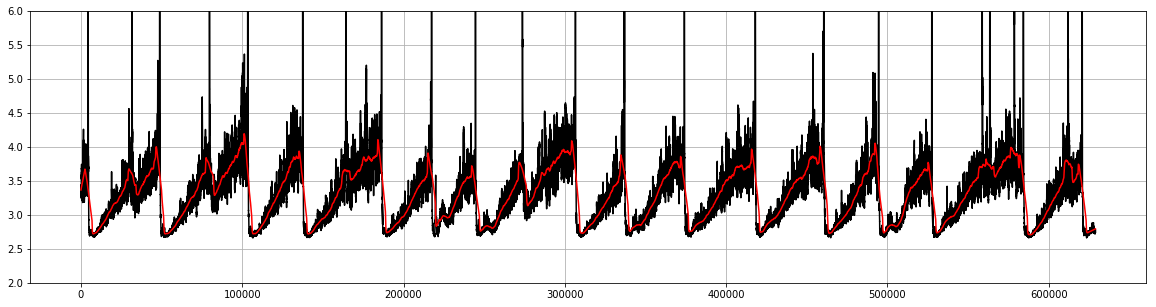

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(med_std1000.values, 'k')
plt.plot(med_std1000_filtered.values, 'r')
plt.ylim([2, 6])
plt.grid(True)

In [5]:
df_valid = pd.read_hdf('../../data/e2/valid_data.h5', key='table')

In [6]:
def test_generator(dataframe, size=150000):
    while True:
        i = random.randint(0, dataframe.shape[0] - size)
        test_sample = df_valid.iloc[i:i+size]
        yield test_sample

In [7]:
test_gen = test_generator(df_valid)

In [8]:
test_sample = next(test_gen)

In [9]:
test_sample_val = Feature(test_sample['s'], '../../data/')\
.r_std(window_size=1000)\
.w_median(window_size=150000, window_stride=1000).data

	 Rolling decorator for r_std: 
w_median(self, window_size=150000, window_stride=1000): 100%|██████████| 1/1 [00:00<00:00, 195.57it/s]
	 window decorator for w_median: 
	 - window size: 150000
	 - window stride: 1000


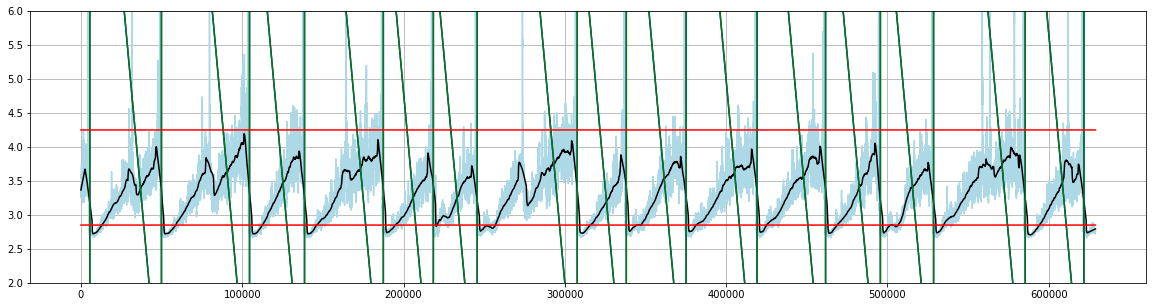

In [15]:
plt.figure(figsize=(20, 5))
plt.plot(med_std1000.values, 'lightblue')
plt.plot(med_std1000_filtered.values, 'k')
plt.plot(ttf.values, 'b')
plt.plot(ttf.values, 'g')
plt.plot((test_sample_val.values + 0.6) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot((test_sample_val.values - 0.8) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.ylim([2, 6])
plt.grid(True)

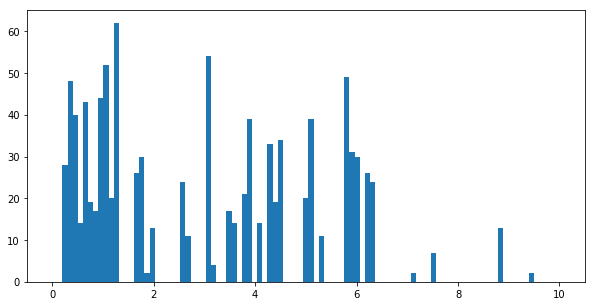

In [12]:
test_sample_val_arr = (test_sample_val.values * np.ones(med_std1000_filtered.values.shape)).reshape(-1,)
med_std1000_filtered_arr = med_std1000_filtered.values.reshape(-1,)
isclose_list = np.isclose(test_sample_val_arr, med_std1000_filtered_arr, atol=1e-3)
isclose_idx = [i for i, x in enumerate(isclose_list) if x]

plt.figure(figsize=(10, 5))
plt.hist(ttf.iloc[isclose_idx].values, bins=np.linspace(0, 10, 100))
plt.show()

In [ ]:
results = []
eps_list = np.linspace(-0.8, 0.6, 100)
for eps in eps_list:    
    test_sample_val_arr = ((test_sample_val.values + eps) * np.ones(med_std1000_filtered.values.shape)).reshape(-1,)
    med_std1000_filtered_arr = med_std1000_filtered.values.reshape(-1,)
    isclose_list = np.isclose(test_sample_val_arr, med_std1000_filtered_arr, atol=1e-3)
    isclose_idx = [i for i, x in enumerate(isclose_list) if x]
    results.append(np.mean(ttf.iloc[isclose_idx].values))

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(results, 'r')
plt.grid(True)
plt.ylabel("ttf_predicted")
plt.xlabel("eps")
plt.show()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(med_std1000.values, 'lightblue')
plt.plot(med_std1000_filtered.values, 'k')
plt.plot(ttf.values, 'b')
plt.plot((test_sample_val.values + 0.6) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot((test_sample_val.values - 0.8) * np.ones(med_std1000_filtered.values.shape), 'r')
plt.plot(max(results) * np.ones(med_std1000_filtered.values.shape), 'g')
plt.plot(min(results) * np.ones(med_std1000_filtered.values.shape), 'g')
# plt.ylim([2, 6])
plt.grid(True)